In [8]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.discrete.discrete_model import NegativeBinomial

In [2]:
data = pd.read_csv('data/likelihood_blogVisits.csv', names=['t'])
data.head() 

,t
0,1.366967
1,0.065920
2,0.968358
3,0.174096
4,0.889502


### Problem 4.1.4. 
**You collect data from Google Analytics that contains the time (in minutes) between each visit for a sample of 50 randomly chosen visits to your blog. The data set is called likelihood_blogVisits.csv, derive an estimate for the mean number of visits per minute**

---

We model the time between first time visits (FTVs) using an exponential distribution. In this case the maximum likelihood estimate (MLE) of the $\lambda$ parameter is given by the reciprocal of the average time between events: $$\frac{1}{\bar{t}}$$

In [3]:
mle = 1 / data['t'].mean()
print(f'MLE given data is {mle:.2f} visits per time period')

MLE given data is 1.63 visits per time period


### Problem 4.1.5.
**Graph the log-likelihood near the MLE.**

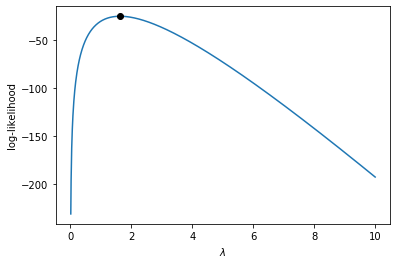

In [4]:
times = list(data['t'])
lambdas = np.linspace(0.01, 10, 999)

# function for calculating probability density ot t given lambda
def exponential_pdf(t, lambd):
    p = lambd * math.exp(-lambd * t)
    return p

# calculate log-likelihoods
likelihoods = []
for lambd in lambdas:
    probs = [exponential_pdf(t, lambd) for t in times]
    loglike = sum(map(math.log, probs))
    likelihoods.append(loglike)

# grab maximum likelihood estimate from all likelihoods
mle_idx = np.argmax(np.array(likelihoods))

# plot
plt.plot(lambdas, likelihoods)
plt.plot(lambdas[mle_idx], likelihoods[mle_idx], 'ko')
plt.xlabel('$\lambda$')
plt.ylabel('log-likelihood')
plt.show();

### Problem 4.1.8.
**Using you maximum likelihood estimate, what is the probability you will wait:**

- 1 minute or more
- 5 minutes or more
- 30 minutes or more

---

We find the probability of waiting greater than a given time $t$ by first finding the value of the cumulative distribution function (cdf) for that time when $\lambda$ is equal to our maximum likelihood estimate (1.63). This is the equivalent of finding the integral of the pdf between 0 and $t$, which gives us the probability of waiting $t$ minutes or less. We then obtain the complement of this value to get the probability of waiting $t$ minutes or more.

In [5]:
for t in [1, 5, 30]:
    # use scipy method to get cdf of exponential dist for t with lambda given by MLE
    p = stats.expon.cdf(t, scale = 1/mle)
    complement = 1 - p
    print(f'The probability of waiting more that {t} minutes is {complement:.4f}')

The probability of waiting more that 1 minutes is 0.1967
The probability of waiting more that 5 minutes is 0.0003
The probability of waiting more that 30 minutes is 0.0000


### Problem 4.1.9.
**Evaluate your model**

---

We evaluate the model by simulating values from our model and comparing the histogram of these simulated values to that of the actual data obseved. We obseve that the model fails to account for the possibility of higher time values that are present in the data observed.

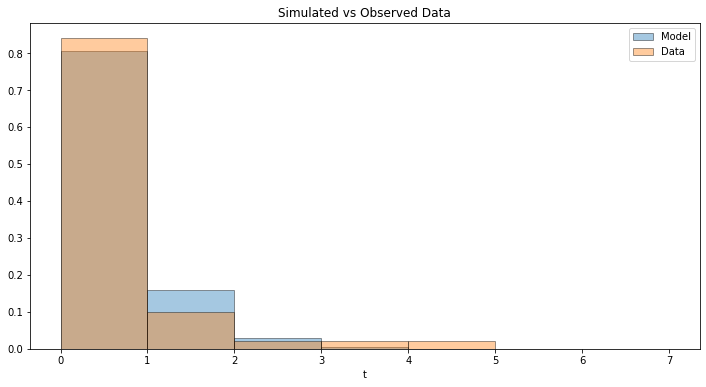

In [6]:
# simulate 10,000 draws from exponential distribution with lambda = mle
simulated_data = stats.expon.rvs(scale= 1 / mle, size=10000, random_state=88)

# horrible unreadable line to get one bin per minute up to max minutes observed / simulated
bins = list(range(max(math.ceil(max(simulated_data)), math.ceil(max(data['t'])))))

# plot histograms for simulated and observed data
plt.figure(figsize=(12, 6))
sns.distplot(simulated_data, kde=False, norm_hist=True, bins = bins,
             hist_kws=dict(edgecolor="k", linewidth=1), label='Model')
sns.distplot(data['t'], kde=False, norm_hist=True, bins = bins,
             hist_kws=dict(edgecolor="k", linewidth=1), label='Data')
plt.legend()
plt.title('Simulated vs Observed Data')
plt.show();